In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from evaluateClassifier import evalModel

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

In [4]:
# create the baseline given to us
from sklearn.naive_bayes import GaussianNB

class given_NB_model():
    def __str__(self):
        return "given_NB"
    
    def predictTest(self, trainFeatures,trainLabels,testFeatures):
        # model = GaussianNB()
        model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
                            GaussianNB())
        model.fit(trainFeatures,trainLabels)
        
        # Use predict_proba() rather than predict() to use probabilities rather
        # than estimated class labels as outputs
        testOutputs = model.predict_proba(testFeatures)[:,1]
        
        return testOutputs

given_NB = given_NB_model()

In [3]:
# create a simple knn with mean imputation

class knn():
    def __str__(self):
        return f"knn_{self.k}"
    
    def __init__(self, k):
        self.k = k

    def predictTest(self, trainFeatures,trainLabels,testFeatures):
        model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
                              MinMaxScaler(),
                            KNeighborsClassifier(n_neighbors=self.k))
        model.fit(trainFeatures,trainLabels)
        
        # Use predict_proba() rather than predict() to use probabilities rather
        # than estimated class labels as outputs
        testOutputs = model.predict_proba(testFeatures)[:,1]
        
        return testOutputs

In [4]:
# create a list of KNNs with ks from 1 to 9
knn_list = []
for i in range(1,10):
    knn_list.append(knn(i))

knn_1 | AUC: 0.7272569223101798 | TPR at FPR = 0.01: 0.03563742154811716
knn_2 | AUC: 0.7652209691813767 | TPR at FPR = 0.01: 0.08458577405857741
knn_3 | AUC: 0.7876018498128166 | TPR at FPR = 0.01: 0.12495625713198935
knn_4 | AUC: 0.7934781348879796 | TPR at FPR = 0.01: 0.2235481171548117
knn_5 | AUC: 0.7943474078280925 | TPR at FPR = 0.01: 0.22656903765690378
knn_6 | AUC: 0.8002700541267282 | TPR at FPR = 0.01: 0.23906754333532576
knn_7 | AUC: 0.8003395959619375 | TPR at FPR = 0.01: 0.2582008368200837
knn_8 | AUC: 0.7998643934213423 | TPR at FPR = 0.01: 0.24635983263598327
knn_9 | AUC: 0.8036949895107731 | TPR at FPR = 0.01: 0.22143305439330546
given_NB | AUC: 0.7989545544106909 | TPR at FPR = 0.01: 0.181255230125523


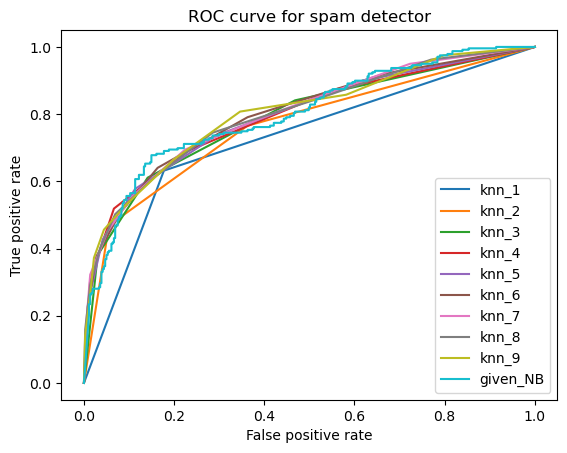

In [5]:
# k = 9 gives the best TPR of 0.293546
evalModel(knn_list + [given_NB])

In [6]:
# create a simple knn with mean imputation

from sklearn.svm import SVC

class svm():
    def __str__(self):
        return f"svm_{self.kernel}"
    
    def __init__(self, kernel):
        self.kernel = kernel

    def predictTest(self, trainFeatures,trainLabels,testFeatures):
        model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
                            SVC(kernel=self.kernel, probability=True))
        model.fit(trainFeatures,trainLabels)
        
        # Use predict_proba() rather than predict() to use probabilities rather
        # than estimated class labels as outputs
        testOutputs = model.predict_proba(testFeatures)[:,1]
        
        return testOutputs

In [7]:
svm_list = []

for kernel in ['linear', 'rbf', 'poly', 'sigmoid']:
    svm_list.append(svm(kernel))

svm_linear | AUC: 0.8502184772656151 | TPR at FPR = 0.01: 0.2301255230125523
svm_rbf | AUC: 0.8758562338460112 | TPR at FPR = 0.01: 0.39330543933054396
svm_poly | AUC: 0.8418734570405313 | TPR at FPR = 0.01: 0.21338912133891214
svm_sigmoid | AUC: 0.6790064789809802 | TPR at FPR = 0.01: 0.13807531380753138
given_NB | AUC: 0.7989545544106909 | TPR at FPR = 0.01: 0.181255230125523


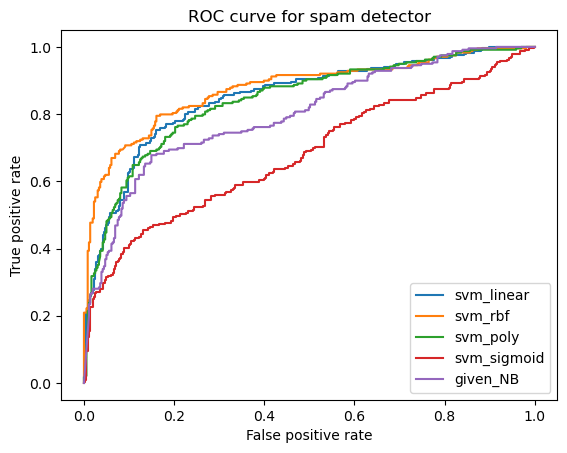

In [8]:
# svms without feature extract do not do great.

evalModel(svm_list + [given_NB])


In [9]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

class logistic_regression():
    def __str__(self):
        return f"logistic_regression (C={self.c})"
    
    def __init__(self, c):
        self.c = c

    def predictTest(self, trainFeatures,trainLabels,testFeatures):
        model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
                           LogisticRegression(C=self.c))
        model.fit(trainFeatures,trainLabels)
        
        # Use predict_proba() rather than predict() to use probabilities rather
        # than estimated class labels as outputs
        testOutputs = model.predict_proba(testFeatures)[:,1]
        
        return testOutputs


In [10]:
lr_list = []
for i in range(3,9):
    lr_list.append(logistic_regression(10**i))

logistic_regression (C=1000) | AUC: 0.8633387035083856 | TPR at FPR = 0.01: 0.24267782426778242
logistic_regression (C=10000) | AUC: 0.8676502972913456 | TPR at FPR = 0.01: 0.2928870292887029
logistic_regression (C=100000) | AUC: 0.8754389828347571 | TPR at FPR = 0.01: 0.3514644351464435
logistic_regression (C=1000000) | AUC: 0.8679632355497862 | TPR at FPR = 0.01: 0.29707112970711297
logistic_regression (C=10000000) | AUC: 0.8754273925288889 | TPR at FPR = 0.01: 0.3682008368200837
logistic_regression (C=100000000) | AUC: 0.8674416717857184 | TPR at FPR = 0.01: 0.2928870292887029
given_NB | AUC: 0.7989545544106909 | TPR at FPR = 0.01: 0.181255230125523


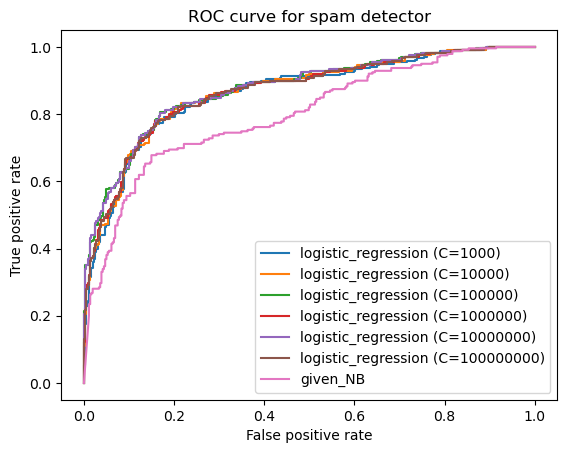

In [11]:
evalModel(lr_list + [given_NB])

In [12]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

class decision_tree():
    def __str__(self):
        return f"decision_tree (depth = {self.depth})"
    
    def __init__(self, depth):
        self.depth = depth

    def predictTest(self, trainFeatures,trainLabels,testFeatures):
        # model = GaussianNB()
        tree_model = DecisionTreeClassifier(criterion='gini', 
                                        max_depth=self.depth, 
                                        random_state=1)
        model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
                           tree_model)
        model.fit(trainFeatures,trainLabels)
        
        # Use predict_proba() rather than predict() to use probabilities rather
        # than estimated class labels as outputs
        testOutputs = model.predict_proba(testFeatures)[:,1]
        
        return testOutputs

decision_tree (depth = 5) | AUC: 0.8429687409450736 | TPR at FPR = 0.01: 0.04899581589958159
decision_tree (depth = 6) | AUC: 0.8362289780827316 | TPR at FPR = 0.01: 0.026433054393305438
decision_tree (depth = 7) | AUC: 0.831731939405881 | TPR at FPR = 0.01: 0.026433054393305438
given_NB | AUC: 0.7989545544106909 | TPR at FPR = 0.01: 0.181255230125523


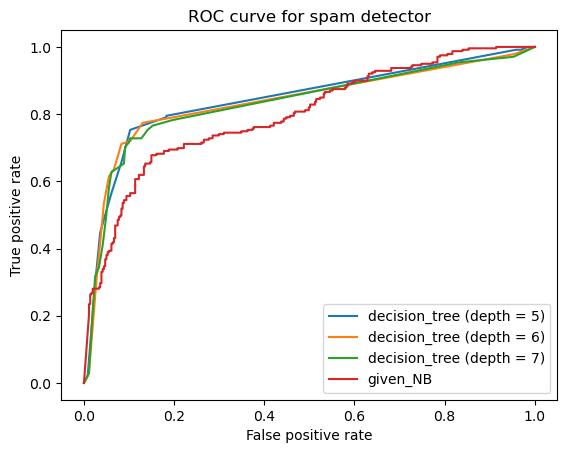

In [13]:
tree_list = []
for i in range(5,8):
    tree_list.append(decision_tree(i))

evalModel(tree_list + [given_NB])

In [14]:
from sklearn.ensemble import RandomForestClassifier

class random_forest():
    def __str__(self):
        return f"random forest ({self.num_estimators} estimators)"
    
    def __init__(self, num_estimators):
        self.num_estimators = num_estimators

    def predictTest(self, trainFeatures,trainLabels,testFeatures):
        model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
                              StandardScaler(),
                           RandomForestClassifier(n_estimators=self.num_estimators, random_state=1))
        model.fit(trainFeatures,trainLabels)
        
        # Use predict_proba() rather than predict() to use probabilities rather
        # than estimated class labels as outputs
        testOutputs = model.predict_proba(testFeatures)[:,1]
        
        return testOutputs

random forest (70 estimators) | AUC: 0.8851400688464168 | TPR at FPR = 0.01: 0.2563598326359833
random forest (80 estimators) | AUC: 0.8865772667740701 | TPR at FPR = 0.01: 0.281255230125523
random forest (90 estimators) | AUC: 0.887301660890831 | TPR at FPR = 0.01: 0.27309623430962343
random forest (100 estimators) | AUC: 0.887579828231667 | TPR at FPR = 0.01: 0.2628870292887029
random forest (110 estimators) | AUC: 0.8877478876667556 | TPR at FPR = 0.01: 0.2563598326359833
random forest (120 estimators) | AUC: 0.8884896672423186 | TPR at FPR = 0.01: 0.25891213389121337
random forest (130 estimators) | AUC: 0.888593979995132 | TPR at FPR = 0.01: 0.30238493723849375
random forest (140 estimators) | AUC: 0.8891155437591999 | TPR at FPR = 0.01: 0.27380753138075314
given_NB | AUC: 0.7989545544106909 | TPR at FPR = 0.01: 0.181255230125523


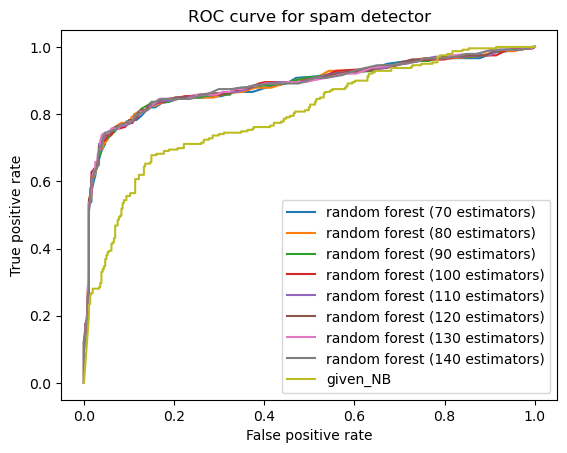

In [15]:
# optimal number of estimators seems to be around 120
# different types of imputation seemed to have no change

model_list = []

for i in range(7, 15):
    rf = random_forest(10 * i)
    model_list.append(rf)

evalModel(model_list + [given_NB])

In [1]:
import xgboost as xgb

class xgb_model():
    def __str__(self):
        return f"xgboost ({self.num_estimators} estimators)"
    
    def __init__(self, num_estimators):
        self.num_estimators = num_estimators

    def predictTest(self, trainFeatures,trainLabels,testFeatures):
        model = make_pipeline(SimpleImputer(missing_values=-1, strategy='mean'),
                              StandardScaler(),
                           xgb.XGBClassifier(n_estimators=self.num_estimators, eval_metric='logloss', random_state=1))
        model.fit(trainFeatures,trainLabels)
        
        # Use predict_proba() rather than predict() to use probabilities rather
        # than estimated class labels as outputs
        testOutputs = model.predict_proba(testFeatures)[:,1]
        
        return testOutputs

xgboost (140 estimators) | AUC: 0.8850082824606607 | TPR at FPR = 0.01: 0.45058626465661644
given_NB | AUC: 0.8056673177626783 | TPR at FPR = 0.01: 0.17934673366834172


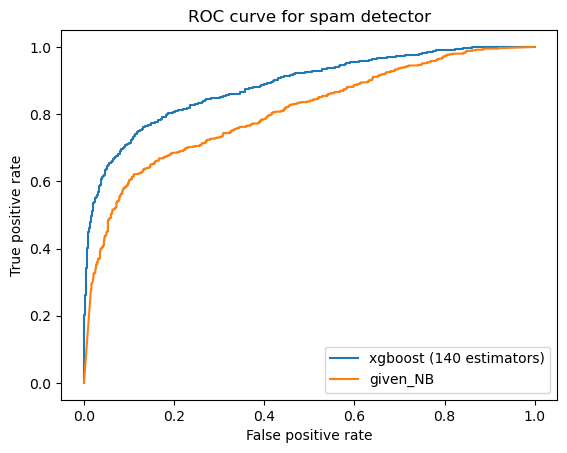

In [5]:
# best amount of estimators seems to be around 130-140
# for metric, all seem similar so using log loss
# Imputation, mean is the best by far

model_list = []

rf = xgb_model(140)
model_list.append(rf)

evalModel(model_list + [given_NB])


given_NB | AUC: 0.7989545544106909 | TPR at FPR = 0.01: 0.181255230125523
knn_9 | AUC: 0.8036949895107731 | TPR at FPR = 0.01: 0.22143305439330546
svm_rbf | AUC: 0.8758678241518794 | TPR at FPR = 0.01: 0.39330543933054396
logistic_regression (C=10000000) | AUC: 0.8754273925288889 | TPR at FPR = 0.01: 0.3682008368200837
decision_tree (depth = 6) | AUC: 0.8362289780827316 | TPR at FPR = 0.01: 0.026433054393305438
random forest (130 estimators) | AUC: 0.888593979995132 | TPR at FPR = 0.01: 0.30238493723849375
xgboost (140 estimators) | AUC: 0.8977619119368561 | TPR at FPR = 0.01: 0.4560669456066946


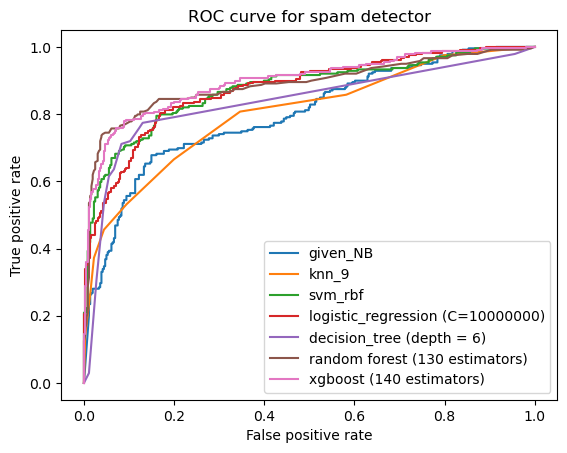

In [18]:
# create a single graph for best of each model

model_list = [given_NB_model(), knn(9), svm('rbf'), logistic_regression(10000000), decision_tree(6), random_forest(130), xgb_model(140)]

evalModel(model_list)